# Python-Blender-Workshop: Hands-On

**Author:** *Jan-Hendrik Müller*, November 2024

Welcome! 👋  
In this course, you'll learn the essential tools to use Blender within Python notebooks.  
Our focus is on practical Python skills that will help you work with Blender, leaving aside much of the theory.

**Things to Know Before We Start:**
* 💡 -> The lightbulb emoji highlights **important information**.
* 🧑‍💻 -> The "Person Behind Computer" emoji indicates a **task** for you to complete.
* If you get stuck, feel free to ask questions or check resources like Stack Overflow or ChatGPT.
* Most importantly: Enjoy the journey!

## Part 1: Objects in Blender

In [1]:
import bpy

💡 The code below will select the default cube and create a variable


In [3]:
cube = bpy.context.active_object
print(cube)

<bpy_struct, Object("Cube") at 0x14114fa20>


Now, we’ll display attributes of the cube in the output.

🧑‍💻 **Run** `cube.location`, `cube.scale`, and `len(cube.data.vertices)`.

💡 **Tip:** After typing `cube.` and pressing the "Tab" key, you’ll see suggestions from autocomplete.

In [4]:
# TODO replace me with your code

🧑‍💻 **Now, manipulate the cube:**

1. Set the Z location with `cube.location.z = 2`.
2. Scale the cube with `cube.scale = (1, 1, 2)`.

In [5]:
# TODO replace me with your code


💡 We can also add default objects (e.g., torus, monkey, plane, ...) and select them with `obj = bpy.context.active_object`.

In [6]:
bpy.ops.mesh.primitive_monkey_add(size=2.5, location=(0, 0, 3))
monkey = bpy.context.active_object

bpy.ops.mesh.primitive_torus_add(major_radius=2, minor_radius=0.3, location=(0,0, 2))
tours = bpy.context.active_object

bpy.ops.mesh.primitive_plane_add(size=3, location=(0, 0, 1.1))  
plane = bpy.context.active_object

💡 Objects can also be removed

In [7]:
bpy.data.objects.remove(tours)

 🧑‍💻 Now, delete the monkey and the plane as well.

💡 The below script will randomly place 10 spheres in the scene.

In [12]:
import random

for i in range(10):
    x = random.uniform(-10, 10)
    y = random.uniform(-10, 10)
    z = 0
    bpy.ops.mesh.primitive_uv_sphere_add(radius=1, location=(x, y, z))

🧑‍💻 Now, run the above cell 5 times.

💡 Note: Executing the cell multiple times will add objects repeatedly.  
While experimenting in a notebook, it's a good practice to clear the entire scene occasionally to avoid clutter.

🚨 **Warning:** The cell below will delete everything from your scene.

In [13]:
def fresh_scene():
    # Deselect and delete all objects except cameras and lights
    bpy.ops.object.select_all(action='DESELECT')
    for obj in bpy.context.scene.objects:
        if obj.type not in {'CAMERA', 'LIGHT'}:
            obj.select_set(True)
    bpy.ops.object.delete()

fresh_scene()

💡 Objects will show up in our scene collection, and we can also assign names to them.

In [14]:
fresh_scene()
cube_names = ["Foo", "Bar", "Baz", "Qux"]
for i, name in enumerate(cube_names):
    bpy.ops.mesh.primitive_cube_add(location=(i * 3, 0, 0))  
    cube = bpy.context.object                                     
    cube.name = name                        

💡 We can also apply modifiers to change an object’s appearance.

In [15]:
cube_names = ["Foo", "Bar", "Baz", "Qux"]

for name in cube_names:
    cube = bpy.data.objects.get(name)
    if cube:   # Check if the cube exists
        bevel_modifier = cube.modifiers.new(name="Bevel", type='BEVEL')
        bevel_modifier.width = 0.5
        bevel_modifier.segments = 3

💡 Running the above cell multiple times will stack modifiers on top of each other, which should be avoided.

🧑‍💻 Try changing the bevel width in the cell below for two different values.

In [16]:
for name in cube_names:
    cube = bpy.data.objects.get(name)
    if cube: # Check if the cube exists
        for modifier in cube.modifiers:
            if modifier.type == 'BEVEL':
                modifier.width = 0.2

💡 Finally, modifiers can also be **removed**.

In [17]:
cube_names = ["Foo", "Bar", "Baz", "Qux"]

for name in cube_names:
    cube = bpy.data.objects.get(name)
    if cube: # Check if the cube exists
        cube.modifiers.clear()

🧑‍💻 **Now, create a simple histogram using 20 cylinders.**

* Place the cylinders along the X-axis.
* Set the height of each cylinder to a random value between 3 and 5.

**Hint:** Use `bpy.ops.mesh.primitive_cylinder_add(radius=0.5, depth=2, location=(0,1,0))` to add a cylinder.

In [18]:
# TODO replace me with your code


💡 We can also create a collection and place objects into it.

In [20]:
fresh_scene()

# Create the Sphere Collection
sphere_collection = bpy.data.collections.new("Sphere Collection")
bpy.context.scene.collection.children.link(sphere_collection)

# Create 5 spheres, name them, and link each to the Sphere Collection
for i in range(5):
    bpy.ops.mesh.primitive_uv_sphere_add(radius=0.5, location=(i * 2, 0, 0))
    sphere = bpy.context.object
    sphere.name = f"Sphere_{i+1}"
    sphere_collection.objects.link(sphere)
    
    # Unlink the sphere from all other collections
    for collection in sphere.users_collection:
        if collection != sphere_collection:
            collection.objects.unlink(sphere)

💡 Delete the "Sphere Collection" collection and all objects within it.

In [21]:
bpy.data.collections.remove(sphere_collection)

# Part 2: Using Python Packages

Let's use Python packages to generate data.

💡 We can install packages using `uv`.

In [24]:
!uv pip install numpy

Audited 1 package in 7ms


💡 We’re using NumPy to create a mesh grid, defining X and Y coordinates with values between -5 and 5.   
The Z values are calculated based on a Gaussian function with a standard deviation (`sigma`) of 2, creating a smooth 3D Gaussian surface.

In [25]:
import numpy as np
sigma = 2
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z = 2 * np.exp(-(x**2 + y**2) / (2 * sigma**2))

💡 Adding spheres in a **for loop** is possible, but it's **slow**.

In [26]:
fresh_scene()
# Flatten the arrays and use zip to iterate over coordinates
for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten()):
    bpy.ops.mesh.primitive_uv_sphere_add(radius=0.1, location=(xi, yi, zi))

# Part 3: Using Meshes

💡 Instead of individual points, we can use meshes and save vertices in a point cloud!

In [29]:
fresh_scene()

import mathutils
# Flatten the arrays and combine into a list of vectors
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten())]

# Create a new mesh and object for the point cloud
mesh = bpy.data.meshes.new("PointCloudMesh")
point_obj = bpy.data.objects.new("PointCloud", mesh)

# Apply the points to the mesh
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()
bpy.context.collection.objects.link(point_obj)

Now, we will use another function:

In [30]:
fresh_scene()

amplitude = 1 

# Generate x and y arrays
x = np.linspace(-10, 10, 150)
y = np.linspace(-10, 10, 150)
x, y = np.meshgrid(x, y)
z = amplitude * np.sin (x) * np.cos(y) 

# Flatten the arrays and combine into a list of vectors
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten())]

# Create a new mesh and object for the point cloud
mesh = bpy.data.meshes.new("PointCloudMesh")
point_obj = bpy.data.objects.new("PointCloud", mesh)

# Apply the points to the mesh
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()
bpy.context.collection.objects.link(point_obj)

💡 We can also **update data** and **modify** the **existing shape**.

🧑‍💻 Run the cell below 3 times, adjusting parameters each time (e.g., try a higher amplitude or a different function).

In [35]:
amplitude = 2
z = amplitude * np.sin(x) * np.cos(y)
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten())]

# Update the existing mesh with the new points
mesh.clear_geometry()  # Clear existing geometry
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()

# Part 4: Manipulating Data Using Pandas

Now, we will use data from the web to build this scene:

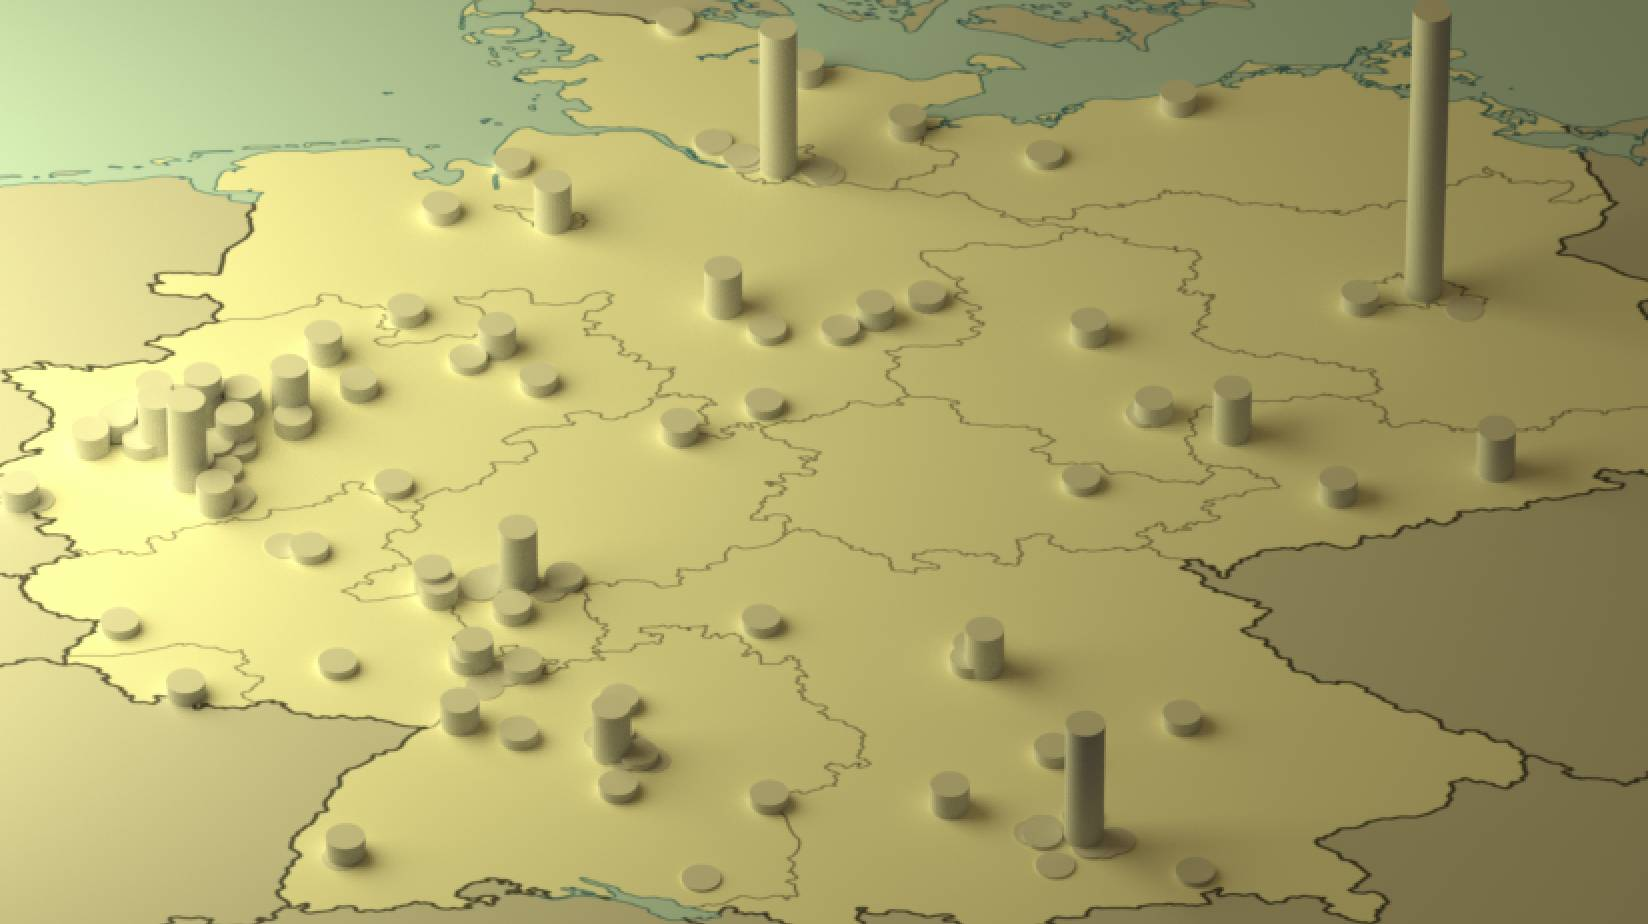

💡 With Pandas, we can read CSV files directly from URLs.

Like above, we install pandas using `uv`

In [36]:
!uv pip install pandas

Audited 1 package in 4ms


💡 Let's **download a dataset** containing population data in Germany in German cities.

In [37]:
import pandas as pd
url = 'https://simplemaps.com/static/data/country-cities/de/de.csv'
df = pd.read_csv(url)

# Drop rows where population_proper is NaN
df = df.dropna(subset=['population_proper'])

df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5200,13.4050,Germany,DE,Berlin,primary,4890363.0,3755251.0
1,Stuttgart,48.7775,9.1800,Germany,DE,Baden-Württemberg,admin,2787724.0,632865.0
2,Munich,48.1375,11.5750,Germany,DE,Bavaria,admin,2606021.0,1512491.0
3,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,2484800.0,1892122.0
4,Cologne,50.9364,6.9528,Germany,DE,North Rhine-Westphalia,NaN,1084831.0,1084831.0
...,...,...,...,...,...,...,...,...,...
122,Neulußheim,49.2933,8.5219,Germany,DE,Baden-Württemberg,NaN,7128.0,7128.0
123,Eichwalde,52.3667,13.6167,Germany,DE,Brandenburg,NaN,6475.0,6475.0
124,Altbach,48.7239,9.3797,Germany,DE,Baden-Württemberg,NaN,6422.0,6422.0
125,Merzhausen,47.9664,7.8286,Germany,DE,Baden-Württemberg,NaN,5347.0,5347.0


💡 We'll also load a basemap and set the coordinate bounds.

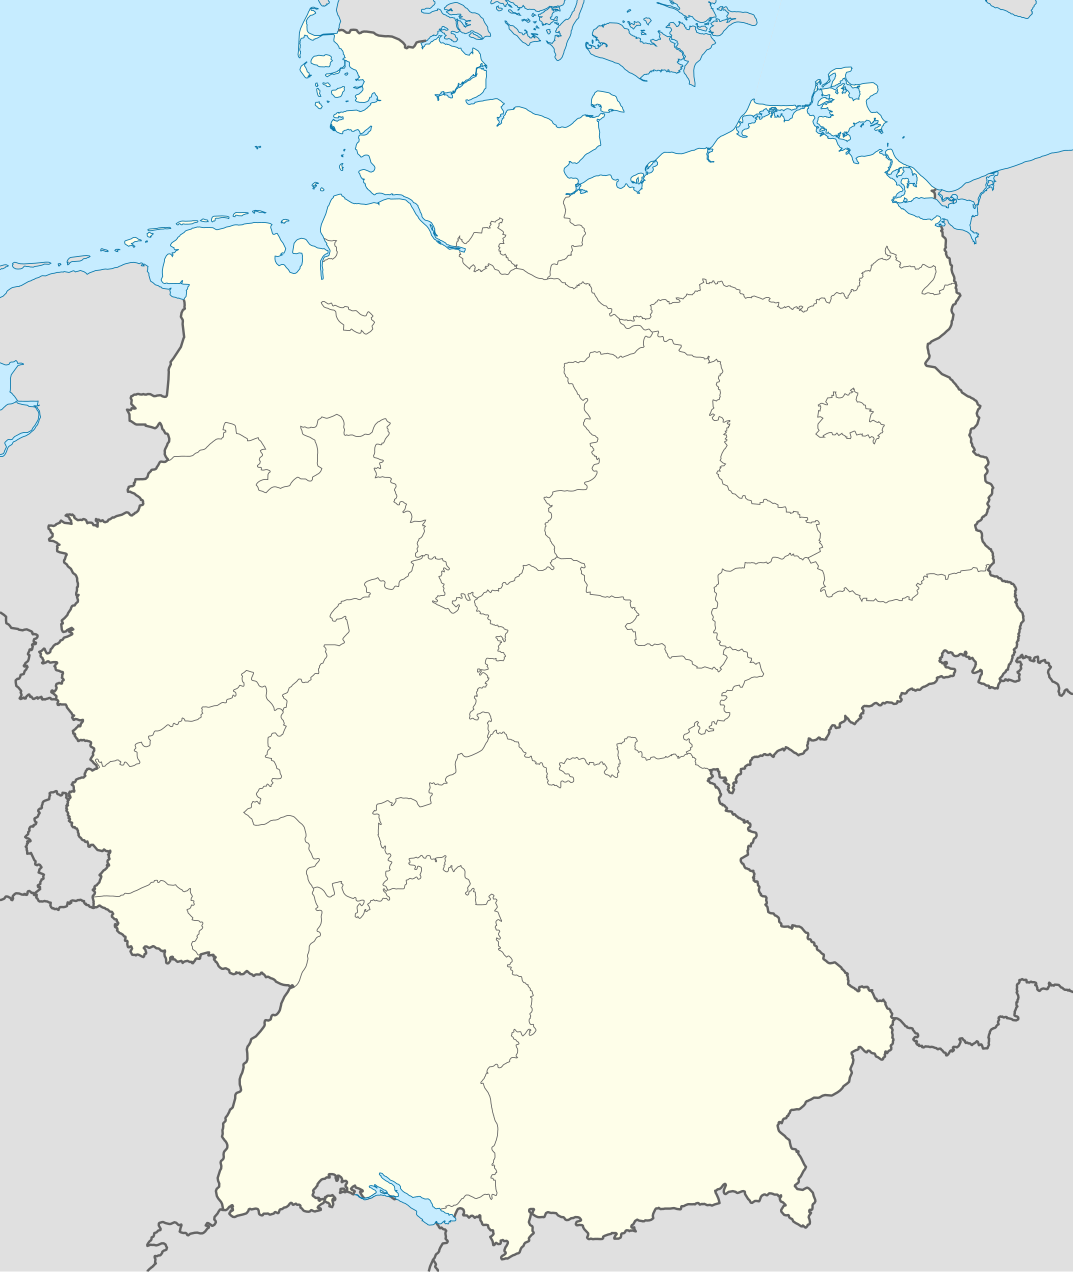

In [38]:
import requests
from IPython.display import Image

url = "https://raw.githubusercontent.com/Octoframes/bpy-workshop/refs/heads/main/Germany_location_map.png"
response = requests.get(url)

with open("Germany_location_map.png", "wb") as file:
    file.write(response.content)

# https://upload.wikimedia.org/wikipedia/commons/0/0d/Germany_location_map.svg
# Define the coordinate bounds
north = 55.1  # Northern latitude in deg
south = 47.2  # Southern latitude in deg
west = 5.5    # Western longitude in deg
east = 15.5   # Eastern longitude in deg

Image("Germany_location_map.png", width=300)

💡 Plot using **Matplotlib**

In [39]:
!uv pip install pandas matplotlib

Audited 2 packages in 4ms


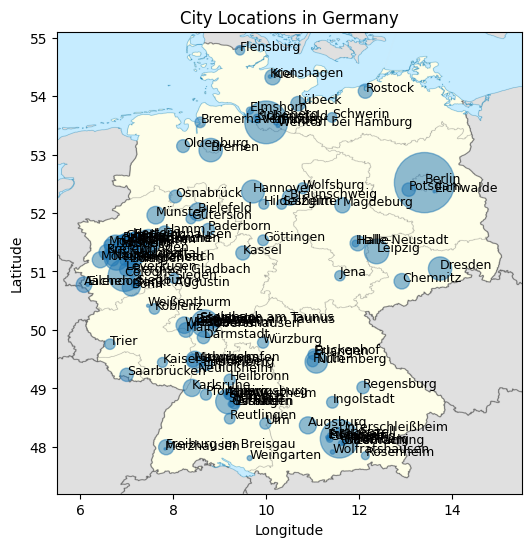

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the base map
base_map = mpimg.imread('Germany_location_map.png')

# Create figure and plot
plt.figure(figsize=(6, 6))
plt.imshow(base_map, extent=[5.5, 15.5, 47.2, 55.1], aspect='auto')

# Plot the cities
plt.scatter(df['lng'], df['lat'], s=0.0005 * df['population_proper'], alpha=0.5)

# Annotate cities
for i, city in enumerate(df['city']):
    plt.text(df['lng'][i], df['lat'][i], city, fontsize=9)

# Set the axis limits to match the specified boundaries
plt.xlim(5.5, 15.5)
plt.ylim(47.2, 55.1)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations in Germany')

plt.show()

💡 Filter for the **coordinates** and **population**.

In [41]:
selected_columns = df[['lat', 'lng', 'population_proper']]
selected_columns

,lat,lng,population_proper
0,52.5200,13.4050,3755251.0
1,48.7775,9.1800,632865.0
2,48.1375,11.5750,1512491.0
3,53.5500,10.0000,1892122.0
4,50.9364,6.9528,1084831.0
...,...,...,...
122,49.2933,8.5219,7128.0
123,52.3667,13.6167,6475.0
124,48.7239,9.3797,6422.0
125,47.9664,7.8286,5347.0


💡 Create a **new mesh** called "PointCloudMesh" in the object "PopulationGermany" to add the data there.

In [43]:
import bpy
import mathutils

fresh_scene()

mesh = bpy.data.meshes.new("PointCloudMesh")
city_points_obj = bpy.data.objects.new("PopulationGermany", mesh)
bpy.context.collection.objects.link(city_points_obj)

💡 **Preprocess** the data and **update mesh** with our points.

In [44]:
offset_x = -8
offset_y = -50
x = df['lng'].values
y = df['lat'].values
z = df['population_proper'].values * 0.0000005

# Update the existing mesh with the new points
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x, y, z)]
mesh.clear_geometry()  # Clear existing geometry
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()

city_points_obj.location = (offset_x, offset_y, 0)

💡 Add a **basemap image** for reference.

In [45]:
# Calculate the center coordinates of the bounding box
center_x = (west + east) / 2
center_y = (north + south) / 2

map_location = (center_x + offset_x, center_y + offset_y, 0 )
# Add the plane and set it at the calculated center location
bpy.ops.mesh.primitive_plane_add(size=1, location= map_location)
plane = bpy.context.object

# Create a new material and assign the image texture
material = bpy.data.materials.new(name="ImageMaterial")
material.use_nodes = True
bsdf = material.node_tree.nodes["Principled BSDF"]

# Add and load the image texture
tex_image = material.node_tree.nodes.new('ShaderNodeTexImage')
tex_image.image = bpy.data.images.load("Germany_location_map.png")

# Connect the texture to the Base Color of the BSDF shader
material.node_tree.links.new(bsdf.inputs['Base Color'], tex_image.outputs['Color'])
plane.data.materials.append(material)

# Calculate the scale based on the geographic bounds
plane.scale.x = (east - west)
plane.scale.y = (north - south) 

In the Blender viewport, change the Shading to "Rendered", so that we can see the map:

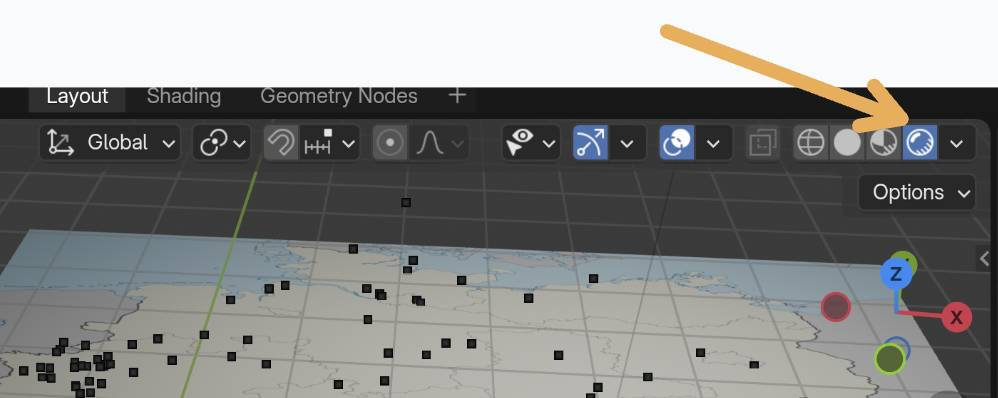

✨ **Congrats!**  
By now, you've learned about **basic object manipulation** and how to **send data from Python to Blender**.

Next, we'll continue with a brief introduction to **Geometry Nodes**.

# Part 5: Introduction to Geometry Nodes

Now, we’ll switch to the Blender UI to explore Geometry Nodes.  
This node tool allows us to create and modify objects in a **procedural** and **non-destructive** way.  
Our fist node setup will look like this:  
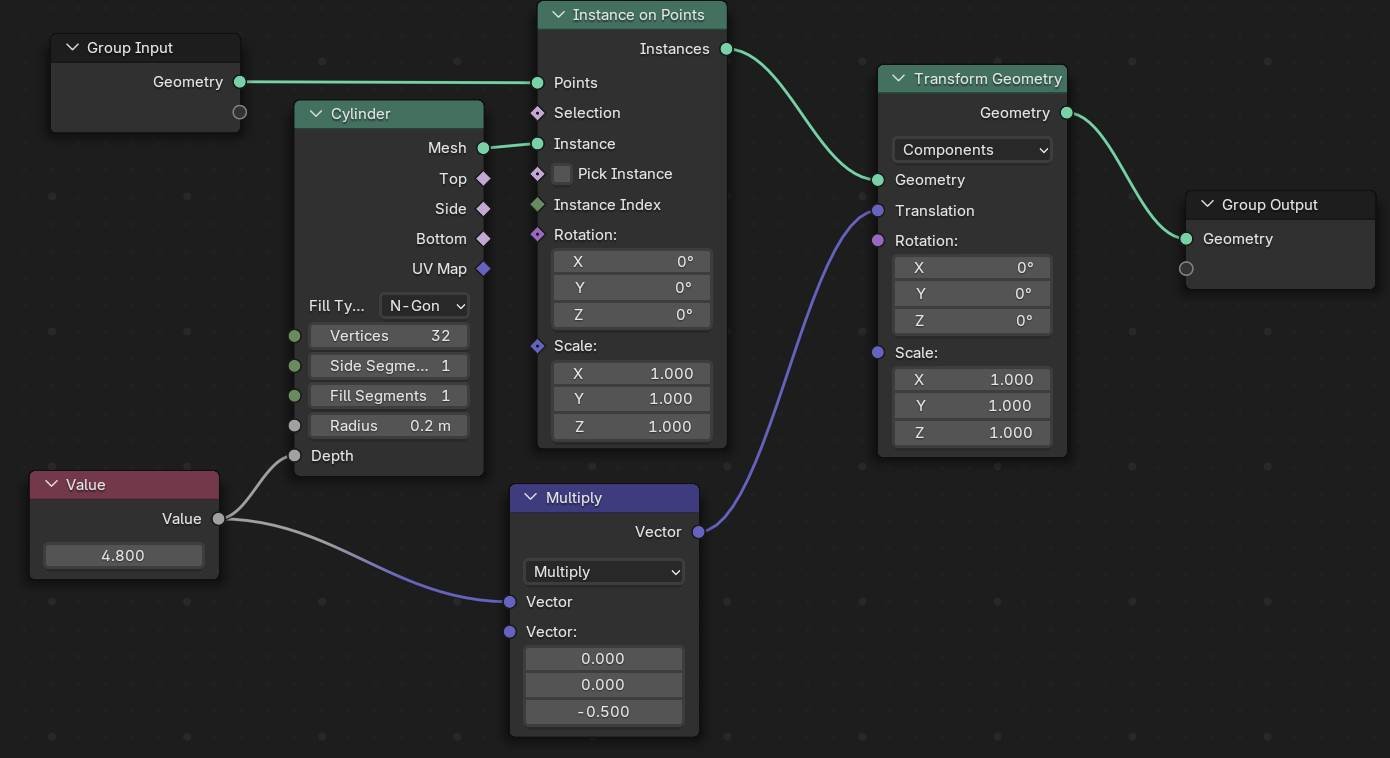

💡 Now we delete the mesh again.  
If you want to re-use this geonode setup in the future, now is a good time to save the Blender file.

In [46]:
bpy.data.objects.remove(city_points_obj)

# Part 6: Using Data Attributes

So far, we've hard-coded values as positions in the mesh.  
But there’s a more **elegant way** to transfer data into our objects using **data attributes**.  
Each vertex of the mesh can store these attributes, which can then be accessed in Geometry Nodes using the **Named Attribute** node.

💡 First, add 127 points at the origin—one for each row in the DataFrame.

In [47]:
df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5200,13.4050,Germany,DE,Berlin,primary,4890363.0,3755251.0
1,Stuttgart,48.7775,9.1800,Germany,DE,Baden-Württemberg,admin,2787724.0,632865.0
2,Munich,48.1375,11.5750,Germany,DE,Bavaria,admin,2606021.0,1512491.0
3,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,2484800.0,1892122.0
4,Cologne,50.9364,6.9528,Germany,DE,North Rhine-Westphalia,NaN,1084831.0,1084831.0
...,...,...,...,...,...,...,...,...,...
122,Neulußheim,49.2933,8.5219,Germany,DE,Baden-Württemberg,NaN,7128.0,7128.0
123,Eichwalde,52.3667,13.6167,Germany,DE,Brandenburg,NaN,6475.0,6475.0
124,Altbach,48.7239,9.3797,Germany,DE,Baden-Württemberg,NaN,6422.0,6422.0
125,Merzhausen,47.9664,7.8286,Germany,DE,Baden-Württemberg,NaN,5347.0,5347.0


In [48]:
mesh = bpy.data.meshes.new("PointCloudMesh")
city_elegant_obj = bpy.data.objects.new("PopulationGermanyElegant", mesh)
bpy.context.collection.objects.link(city_elegant_obj)

length = len(df)
vertices = [(0, 0, 0) for _ in range(length)]
mesh.from_pydata(vertices, [], [])
mesh.update()

In [49]:
# Add each attribute individually to the mesh 
lat_attr = mesh.attributes.new(name='lat', type='FLOAT', domain='POINT')
lng_attr = mesh.attributes.new(name='lng', type='FLOAT', domain='POINT') 
population_attr = mesh.attributes.new(name='population_proper', type='FLOAT', domain='POINT')

In [50]:
# set the values for the attributes
lat_attr.data.foreach_set('value', df['lat'].values)
lng_attr.data.foreach_set('value', df['lng'].values)
population_attr.data.foreach_set('value', df['population_proper'].values)

mesh.update()

the blender Geometry Nodes Spreadsheet will now look like this:
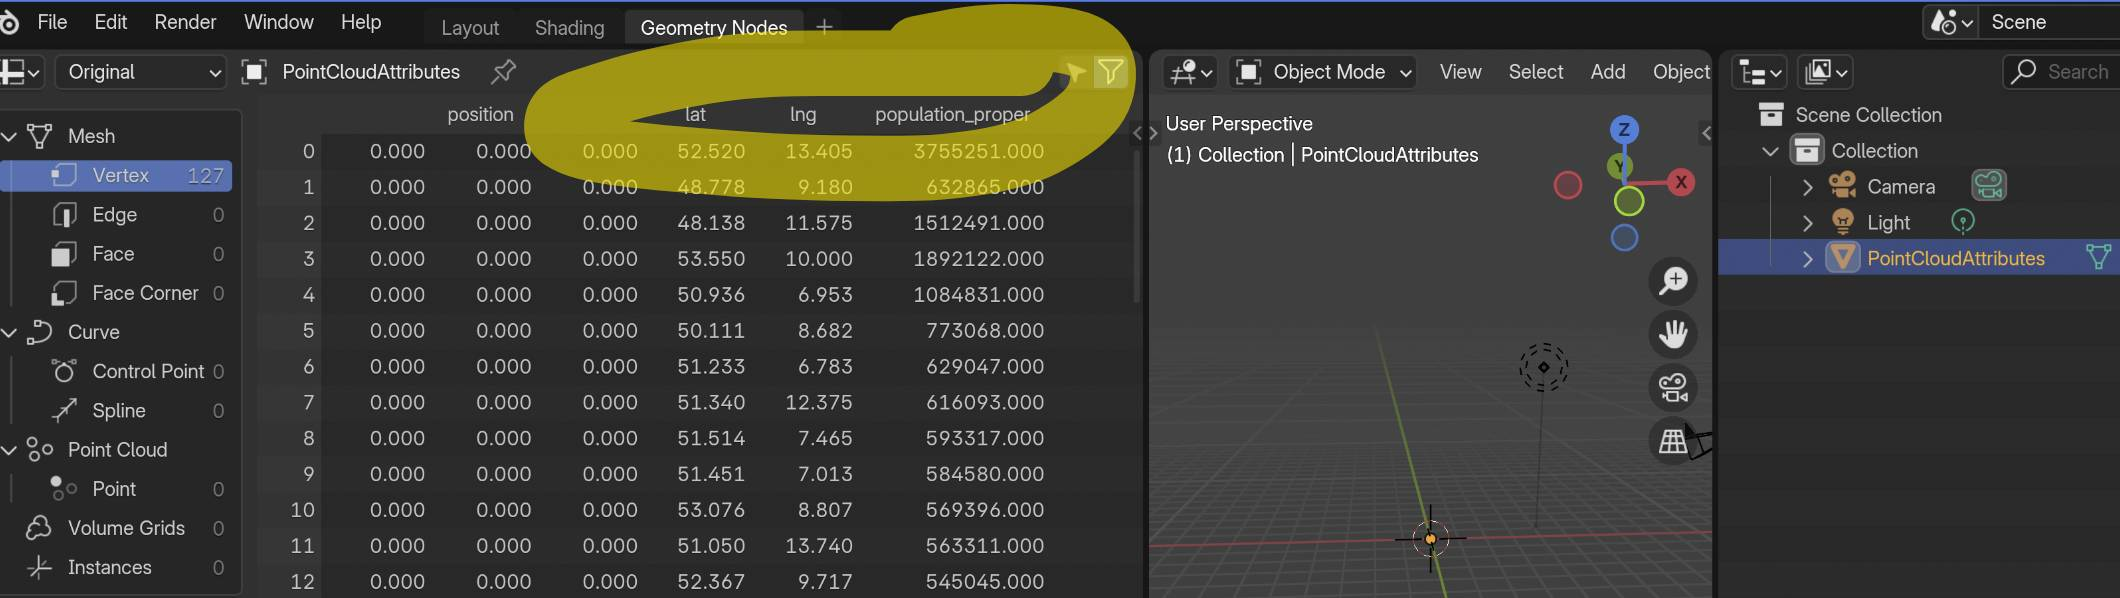

💡 Now, we can update this data!  
🧑‍💻 **Task:** Scale the values based on the items in the below TODOS.

In [53]:
# set the values for the attributes
lat_attr.data.foreach_set('value', df['lat'].values-50)

# TODO: Add an offset to the longitude of -8
lng_attr.data.foreach_set('value', df['lng'].values) 

 # TODO: Add a multiplier of 0.0000005 to the population
population_attr.data.foreach_set('value', df['population_proper'].values)

mesh.update()

✨ **Congrats!** Our data is now in place.

Now, we want to use **Named Attribute** nodes in order to process these datapoints.  

🧑‍💻 **Task:** Add the following Geometry Nodes setup to the scene.   

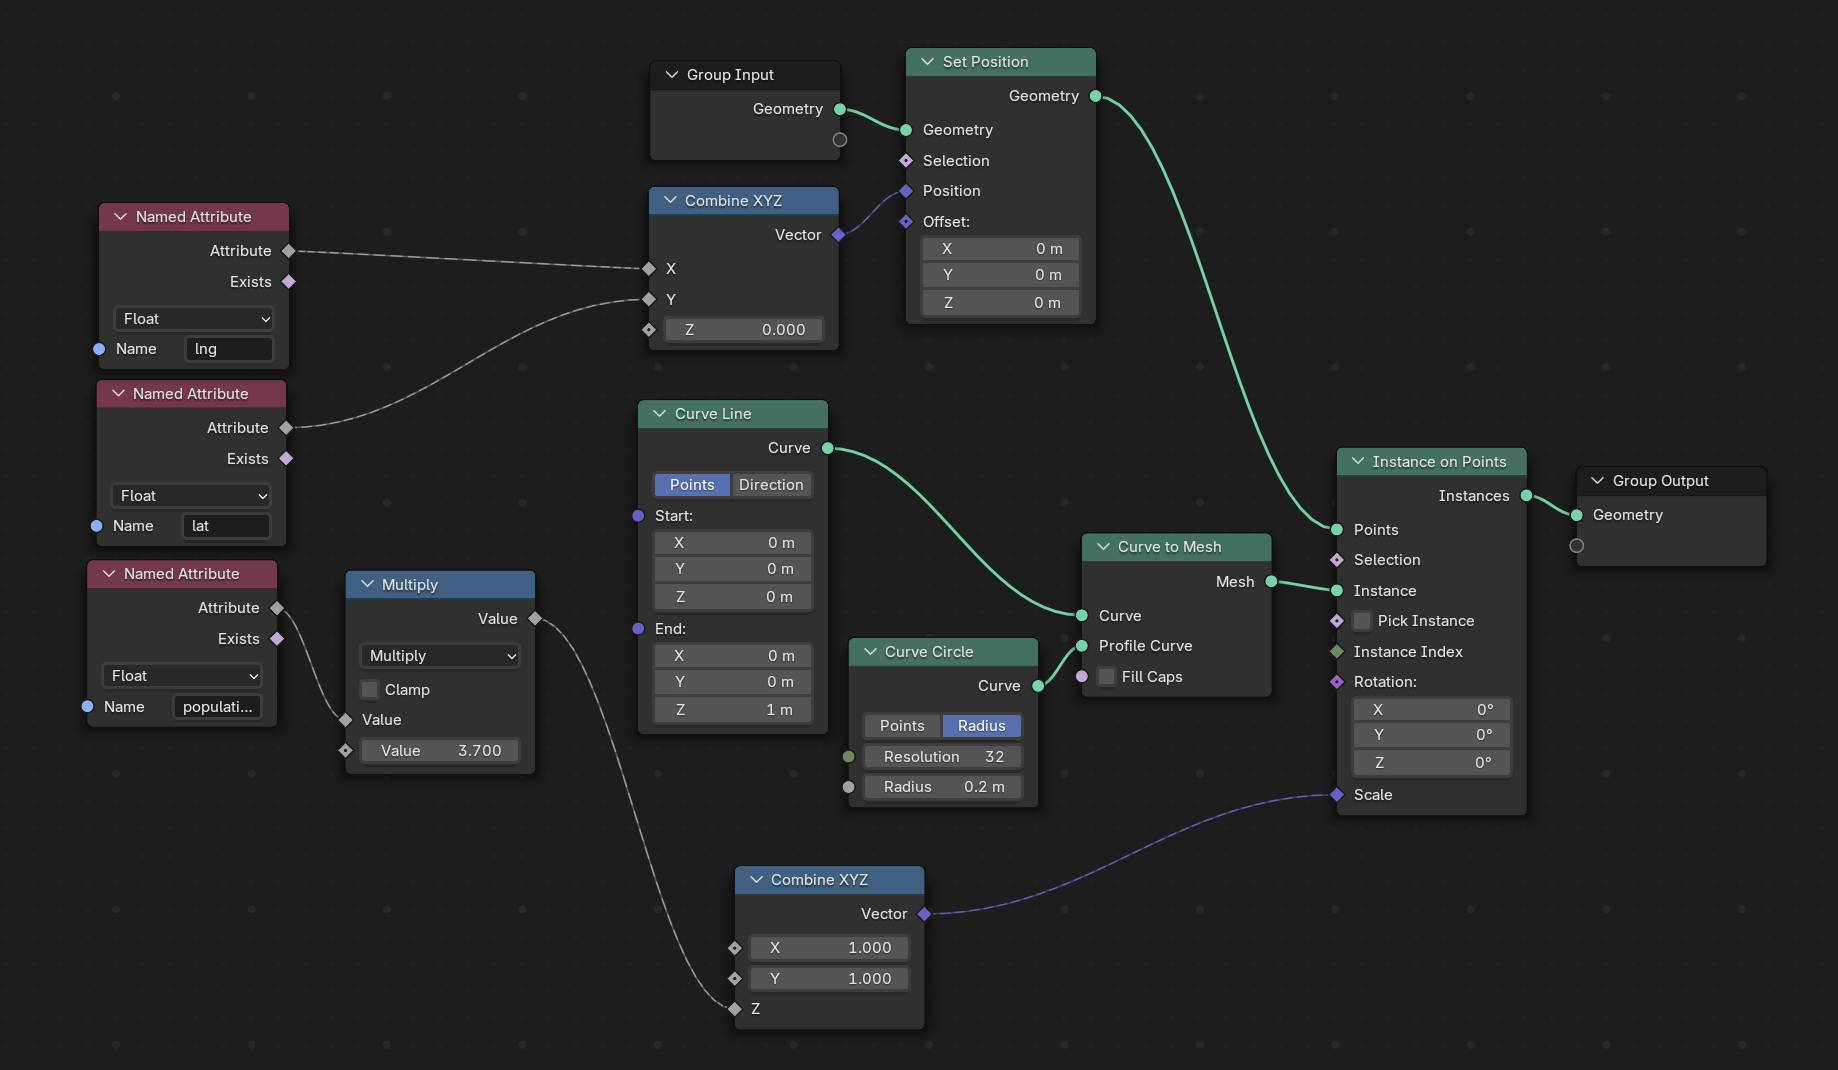

🧑‍💻 **Task:** Give the setup a name the geonodes setup a name



**Scene Setup**

Next, we’ll add some visual tweaks.

🧑‍💻 **Task:** Change the render engine from "EEVEE" to "CYCLES".  
🧑‍💻 **Task:** Add 3 area lights and adjust their colors.  
🧑‍💻 **Task:** Adjust the camera position. Move the camera farther from the scene and increase the focal length. This will make lines appear more parallel.

🧑‍💻 **Task:** Render the scene and save the result. Then switch back from "CYCLES" to "EEVEE".

# Part 7: Advanced Pandas Operations

With the deafault `bpy` API, we have very fine control over everything in Blender, which is great!  
However, it’s sometimes beneficial to create custom workflows and automate specific tasks.  
In the example above, we manually call the `foreach_set` function for every row and need to know the data type (e.g., integer, float). 

It would be beneficial to have helper functions for this.

💡 The `bpy-pandas-mesh` Python package provides a wrapper for Pandas DataFrames, making this process more efficient.

In [54]:
!uv pip install bpy-pandas-mesh

Audited 1 package in 4ms


Next, we will create a mesh using the `PandasMesh` class.

🧑‍💻 **Task:** Before running the code below, hide the "PopulationGermanyElegant" object in the GUI.

In [55]:
from pandas_mesh import PandasMesh
blender_mesh = PandasMesh(dataframe=df, object_name="PopulationPandas")

Columns not included (unsupported data types): ['city', 'country', 'iso2', 'admin_name', 'capital']
Columns added to the mesh: ['lat', 'lng', 'population', 'population_proper']


💡 Note **Strings** are **not supported** in the spreadsheets, so they are not included.  
💡 Now, we’ll create a second DataFrame with adjusted information.

In [56]:
df_adjusted = df.copy()
df_adjusted['lat'] = df_adjusted['lat'] - 50
df_adjusted['lng'] = df_adjusted['lng'] - 8
df_adjusted['population_proper'] = df_adjusted['population_proper'] * 0.0000005

blender_mesh.update(dataframe=df_adjusted)

Columns not included (unsupported data types): ['city', 'country', 'iso2', 'admin_name', 'capital']
Columns added to the mesh: ['lat', 'lng', 'population', 'population_proper']


In [57]:
df_adjusted2 = df_adjusted.copy()


df_adjusted2['state_capital '] = df_adjusted2['capital'].apply(lambda x: True if x in ['admin', 'primary'] else False)



blender_mesh.update(dataframe=df_adjusted2)
df_adjusted2

Columns not included (unsupported data types): ['city', 'country', 'iso2', 'admin_name', 'capital']
Columns added to the mesh: ['lat', 'lng', 'population', 'population_proper', 'state_capital ']


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,state_capital
0,Berlin,2.5200,5.4050,Germany,DE,Berlin,primary,4890363.0,1.877625,True
1,Stuttgart,-1.2225,1.1800,Germany,DE,Baden-Württemberg,admin,2787724.0,0.316433,True
2,Munich,-1.8625,3.5750,Germany,DE,Bavaria,admin,2606021.0,0.756246,True
3,Hamburg,3.5500,2.0000,Germany,DE,Hamburg,admin,2484800.0,0.946061,True
4,Cologne,0.9364,-1.0472,Germany,DE,North Rhine-Westphalia,NaN,1084831.0,0.542415,False
...,...,...,...,...,...,...,...,...,...,...
122,Neulußheim,-0.7067,0.5219,Germany,DE,Baden-Württemberg,NaN,7128.0,0.003564,False
123,Eichwalde,2.3667,5.6167,Germany,DE,Brandenburg,NaN,6475.0,0.003237,False
124,Altbach,-1.2761,1.3797,Germany,DE,Baden-Württemberg,NaN,6422.0,0.003211,False
125,Merzhausen,-2.0336,-0.1714,Germany,DE,Baden-Württemberg,NaN,5347.0,0.002674,False


🧑‍💻 **Task:** Now, let’s re-use the Geometry Nodes setup from our previous object "PopulationGermanyElegant" in "PopulationPandas".  
🧑‍💻 **Task:** Next, add a torus on top of each "State Capital".  
🧑‍💻 **Task:** Add a color to the torrus.


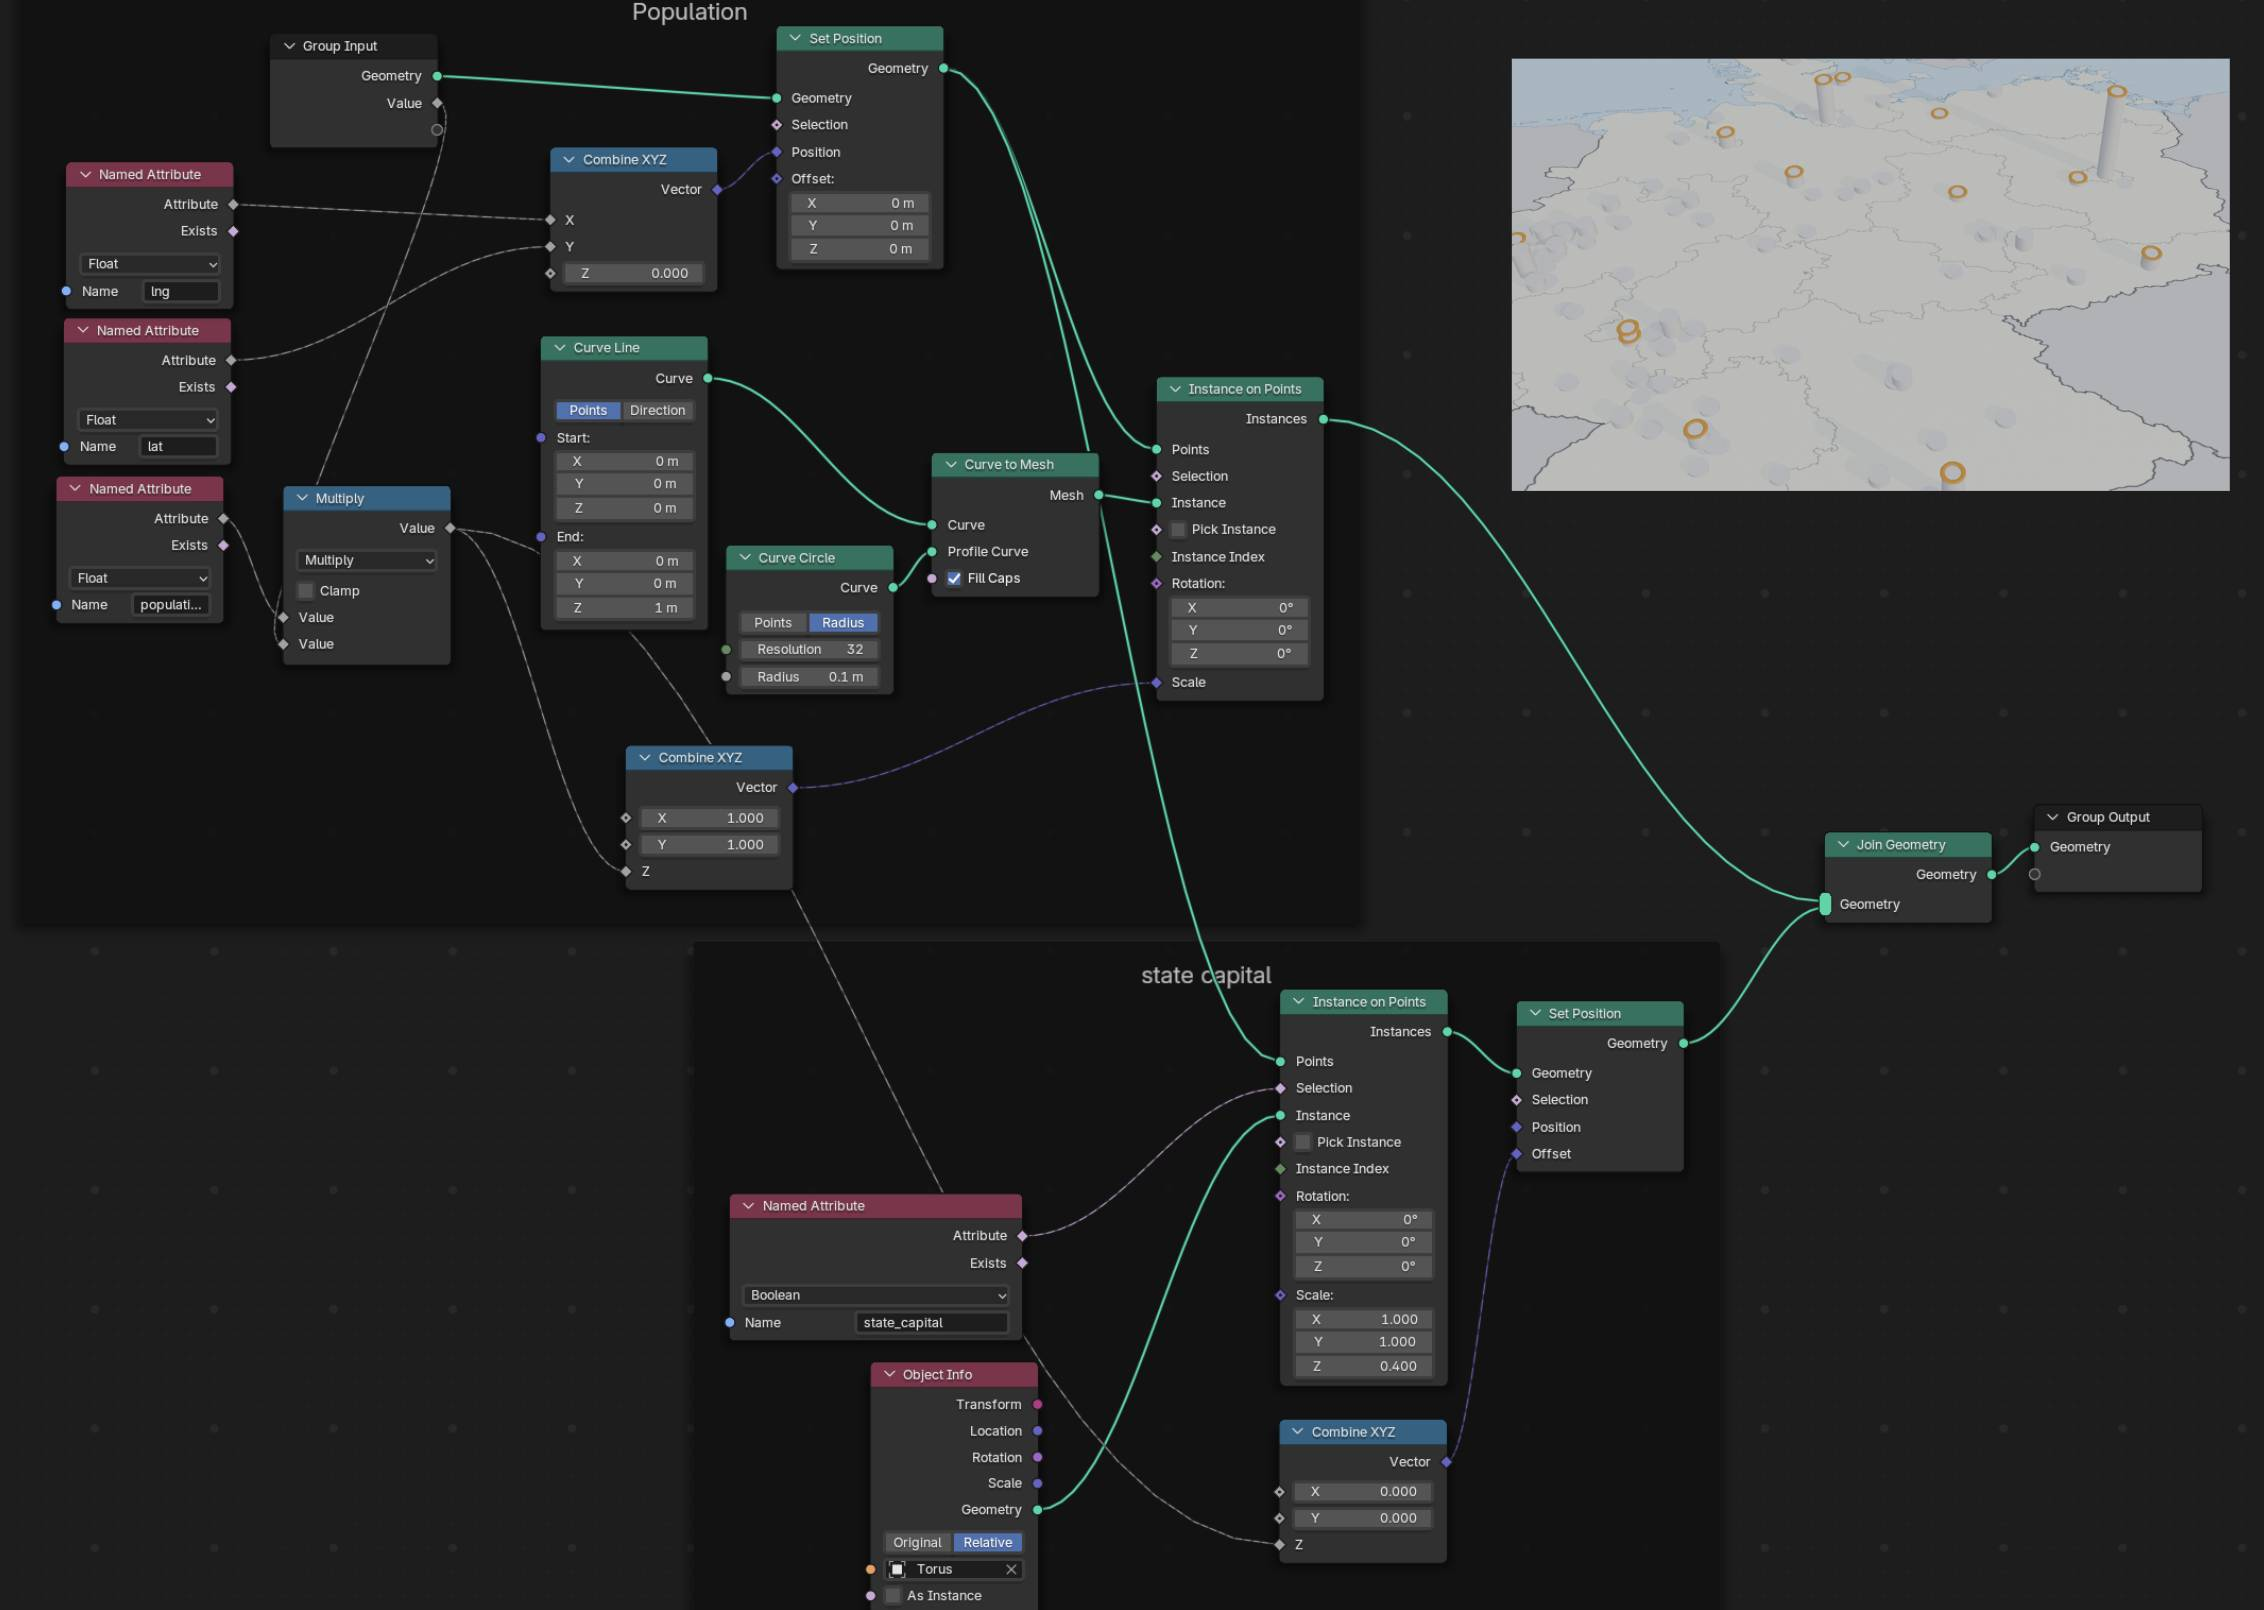

# Part 8: Using attributes in shaders

Now, we want to use these **data attributes in shaders**. 

The setup can look like this:  
1. First, apply a new material to the cylinders within Geometry Nodes.  
2. Next, use the `state_capital` attribute in the shader node tree to control the mix shader.

💡 **Note:** Ensure the **Type** of the attribute is set to "Instancer" and not "Object" for this to work as expected.

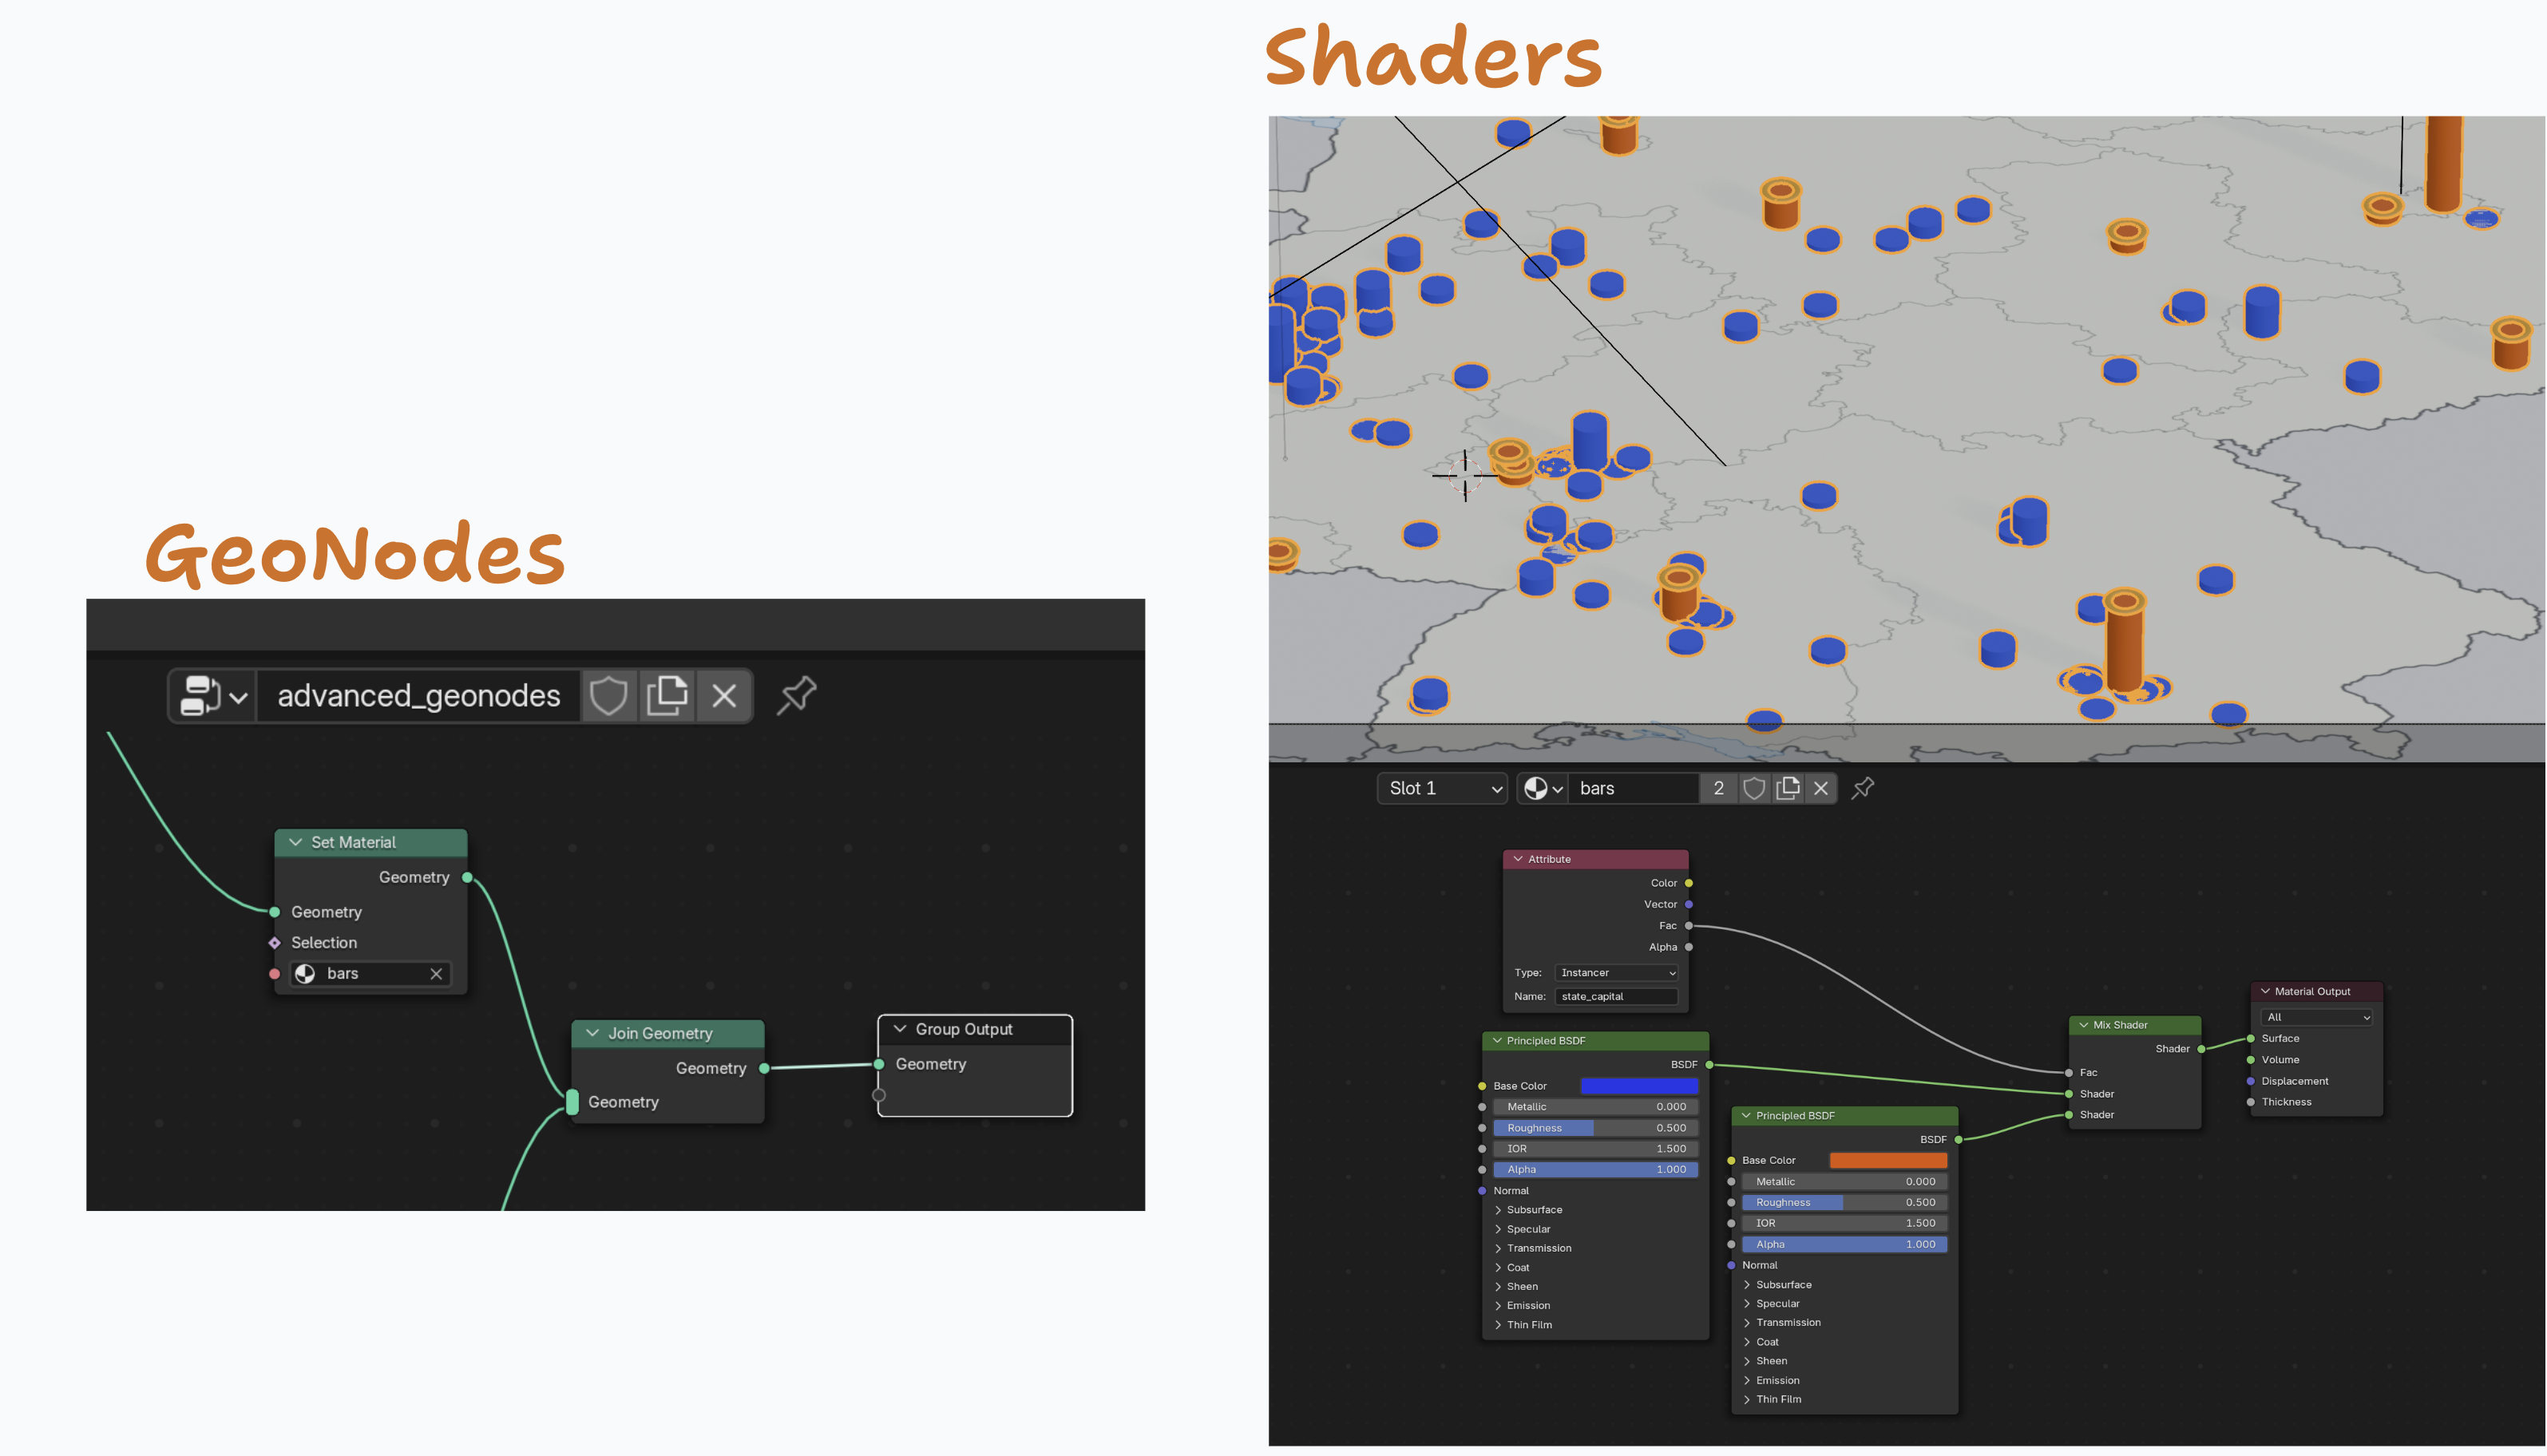